In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

In [3]:
# Create dummy dataset
data = {
    'feature1': [2, 3, 4, 5, 1, 2, 6, 4, 5, 7],
    'feature2': [4, 5, 7, 6, 2, 3, 7, 5, 6, 9],
    'target': ['Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog']
}
df = pd.DataFrame(data)
df.head()

,feature1,feature2,target
0,2,4,Cat
1,3,5,Cat
2,4,7,Dog
3,5,6,Dog
4,1,2,Cat


In [5]:
# Split data into features and target
X = df[['feature1', 'feature2']]
y = df['target']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

Accuracy: 1.00



In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         2
         Dog       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



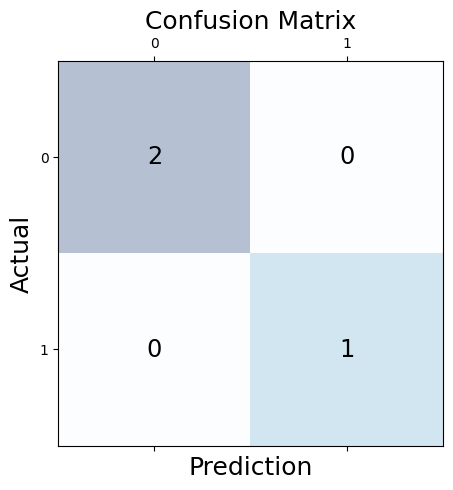

In [15]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

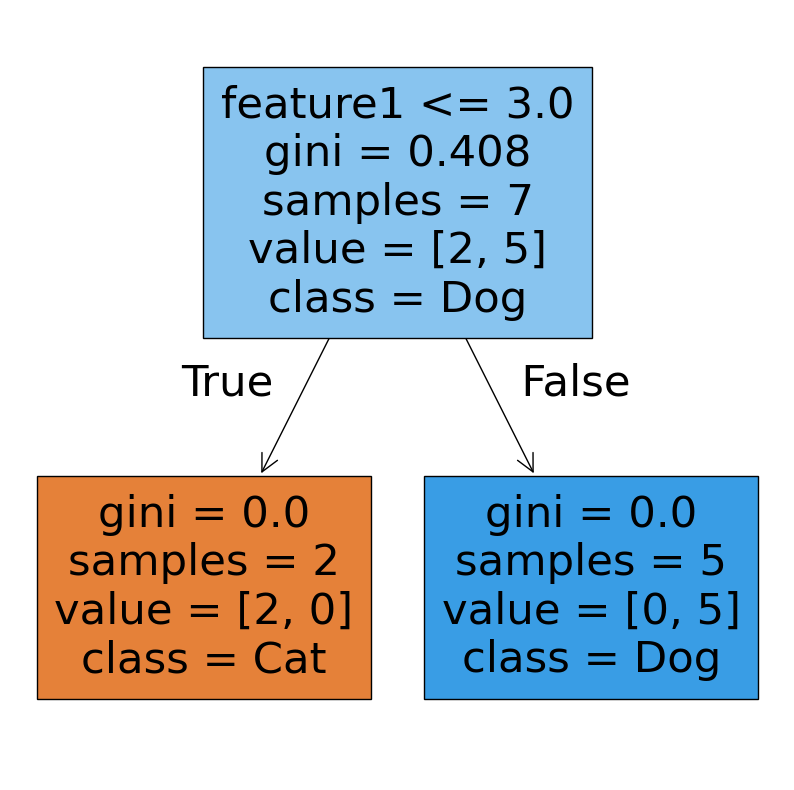

In [12]:
# Plotting the decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True,feature_names=['feature1','feature2'], class_names=np.unique(y))
plt.show()

In [16]:
print("\nFeature Importances:", model.feature_importances_)


Feature Importances: [1. 0.]


## Hyperparameter Tuning

D:\Users\delhi\miniconda3\envs\rl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 1.0
Accuracy with best model: 1.00

Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         2
         Dog       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:
[[2 0]
 [0 1]]


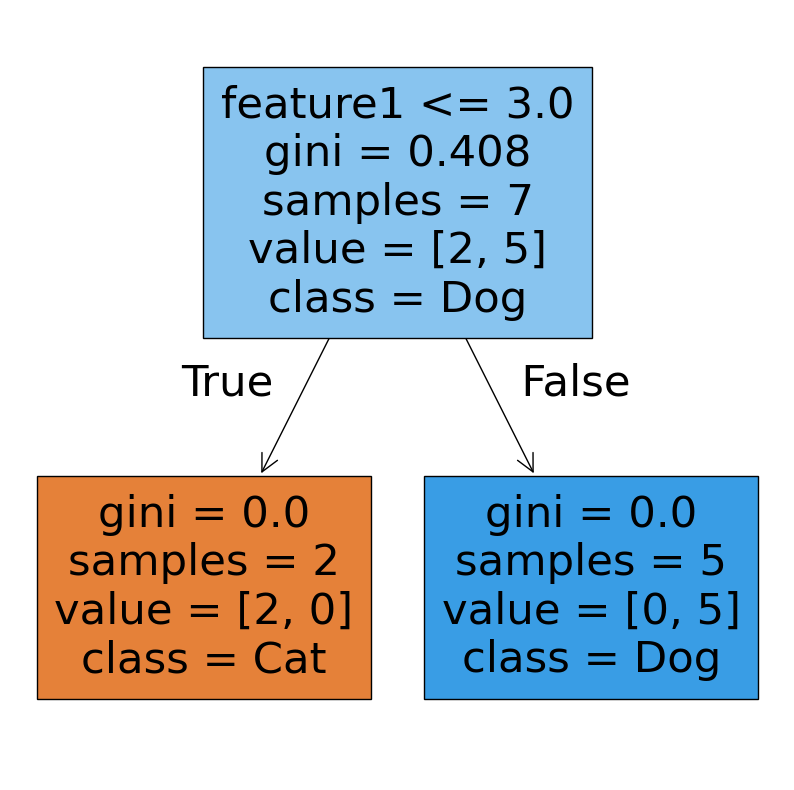

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7]
}

# Initialize Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best model: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


#plotting decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(best_model,filled=True,feature_names=['feature1','feature2'], class_names=np.unique(y))
plt.show()